In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.ensemble import ExtraTreesClassifier
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
X_data = pd.read_csv('training_data.csv')
Y_data = pd.read_csv('train_data_classlabels.csv')

In [30]:
print('Number Of Data Instances : ', X_data.shape[0])
print('Number Of Features : ', X_data.shape[1])

Number Of Data Instances :  57116
Number Of Features :  30


In [31]:
X_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [32]:
X_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,...,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,...,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,...,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,...,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,...,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57111,31552,0.458761,-2.050144,-0.466434,-0.042731,-1.449051,-0.904008,0.379405,-0.383444,-0.750893,...,0.452662,-0.160474,-1.002111,-0.428028,0.451232,0.230248,1.041581,-0.165922,0.081869,496.74
57112,42544,0.954816,-0.719838,0.901751,0.080120,-0.814359,0.654128,-0.647104,0.285089,0.819952,...,0.173407,-0.105128,-0.227548,-0.042204,-0.192197,0.070007,0.961082,-0.034767,0.016900,109.12
57113,41172,-0.926829,-0.886473,2.370167,0.300101,-2.076338,1.149399,0.555557,0.376249,1.209615,...,0.599251,0.165073,0.376110,0.677804,0.472248,-0.166598,1.069099,-0.068823,0.045220,333.00
57114,41560,0.939876,-0.143305,0.409470,1.401199,-0.315610,0.041466,0.057357,0.118171,0.069849,...,-0.036664,0.011079,0.015211,-0.121116,0.225331,0.559770,-0.350135,0.017372,0.021977,94.90


# Exploratory Data Analysis

# Feature Selection Using Correlation Matrix And HeatMap

Here we have tried to use correlation matrix to understand how well features are correlated to target variable Y_data. For this purpose, we generate heatmap that will help us in understanding the correlation. Since the number of features are 30, we are going to create 3 maps just for the purpose of clarity and understanding. The inferences remain same.

In [33]:
X_map_1_data = X_data.iloc[:,0:10]
X_map_2_data = X_data.iloc[:,10:20]
X_map_3_data = X_data.iloc[:,20:30]
X_map_1_data.insert(10,'Y',Y_data,True)
X_map_2_data.insert(10,'Y',Y_data,True)
X_map_3_data.insert(10,'Y',Y_data,True)

# First 10 Features

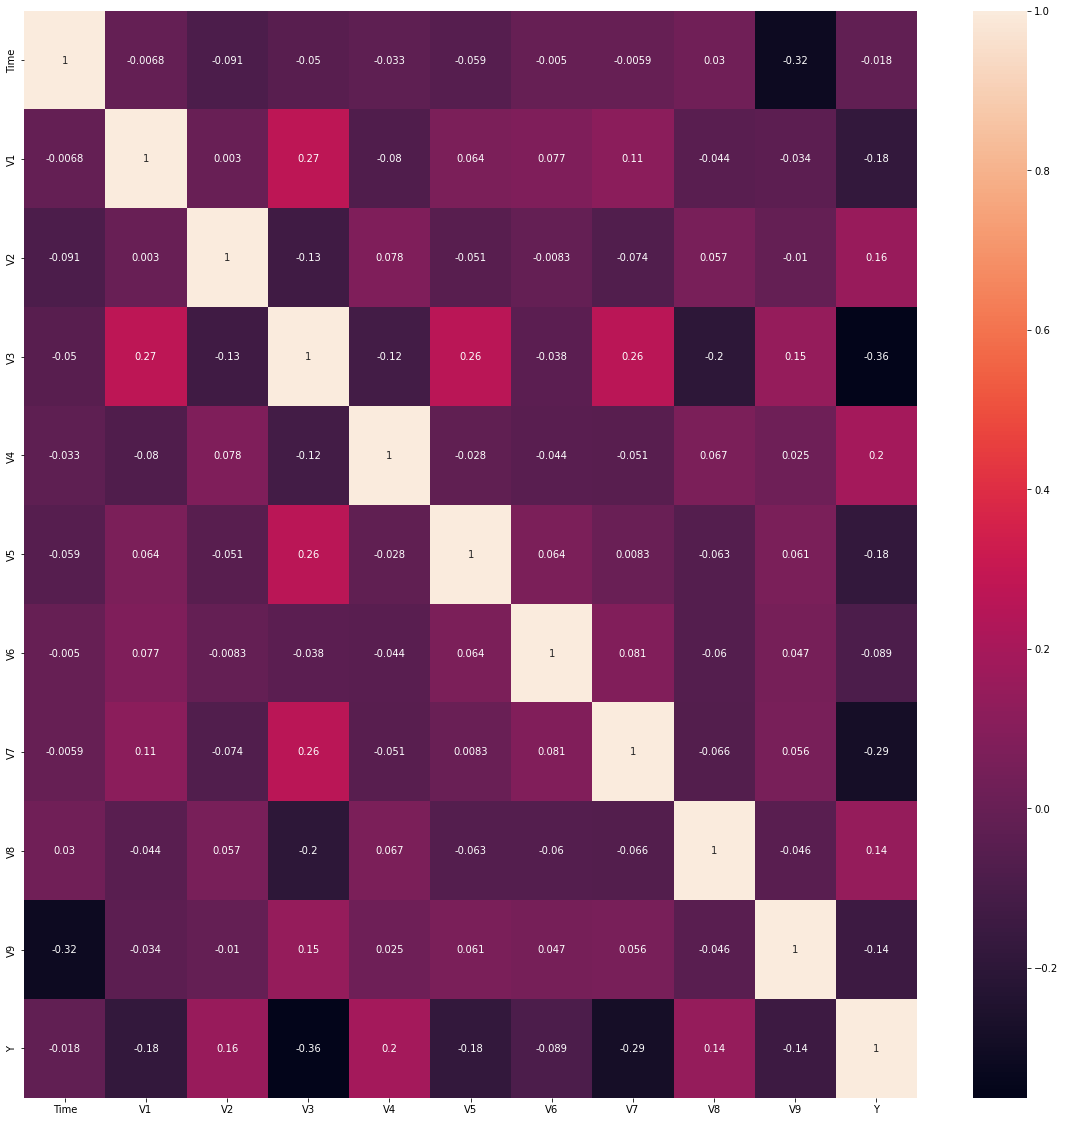

In [34]:
plt.figure(figsize=(20,20))
corr = X_map_1_data.corr()
map_1 = sns.heatmap(corr,annot=True)

Now we can see that for the first 10 features V2, V4 and V8 are the ones that correlate most with target variabe Y.

# Next 10 Features

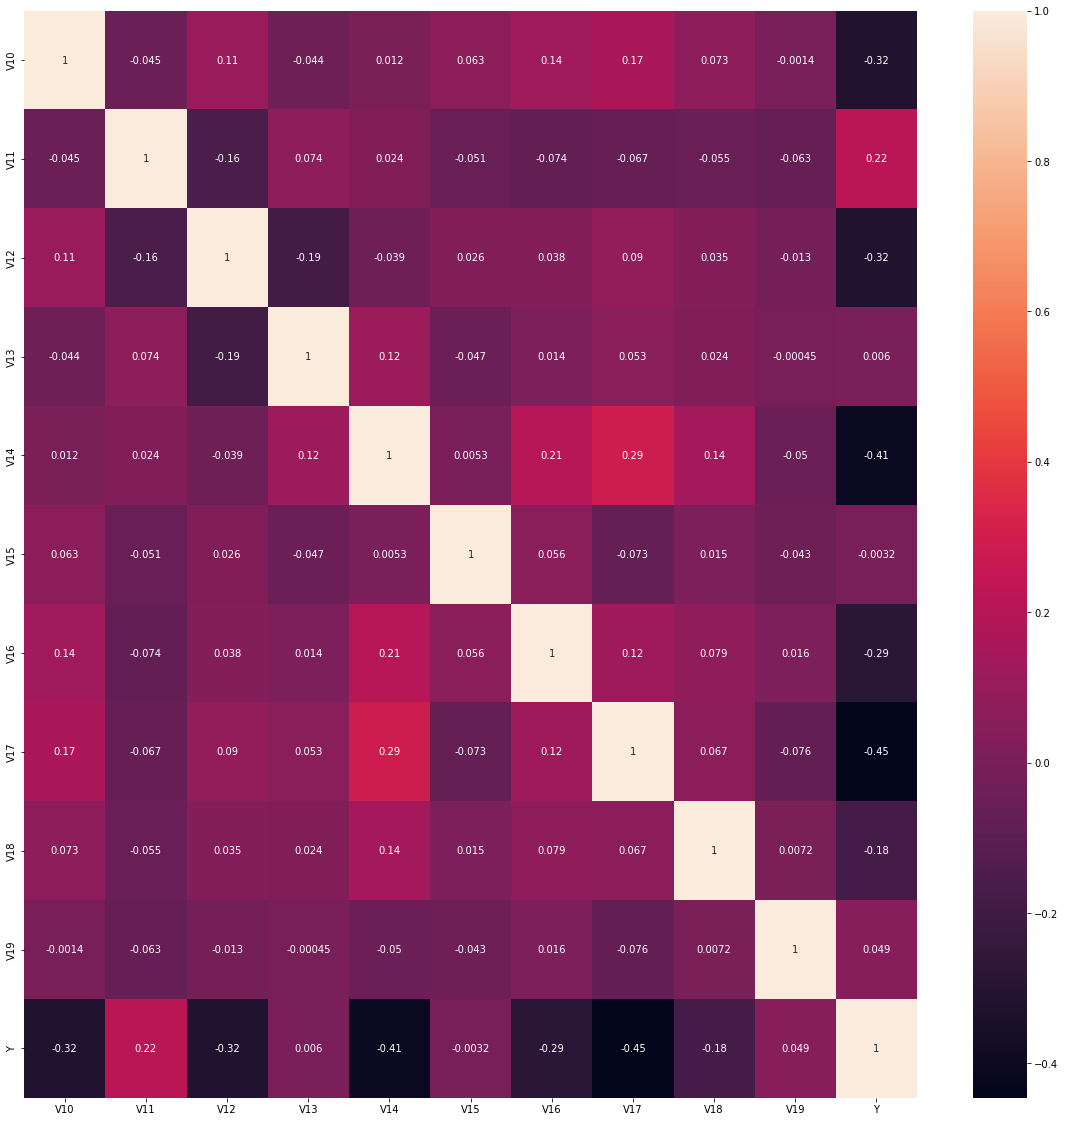

In [35]:
plt.figure(figsize=(20,20))
corr = X_map_2_data.corr()
map_2 = sns.heatmap(corr,annot=True)

For these set of features, V11 shows high correlation with target variable Y in comparison to others.

# Last 10 Features

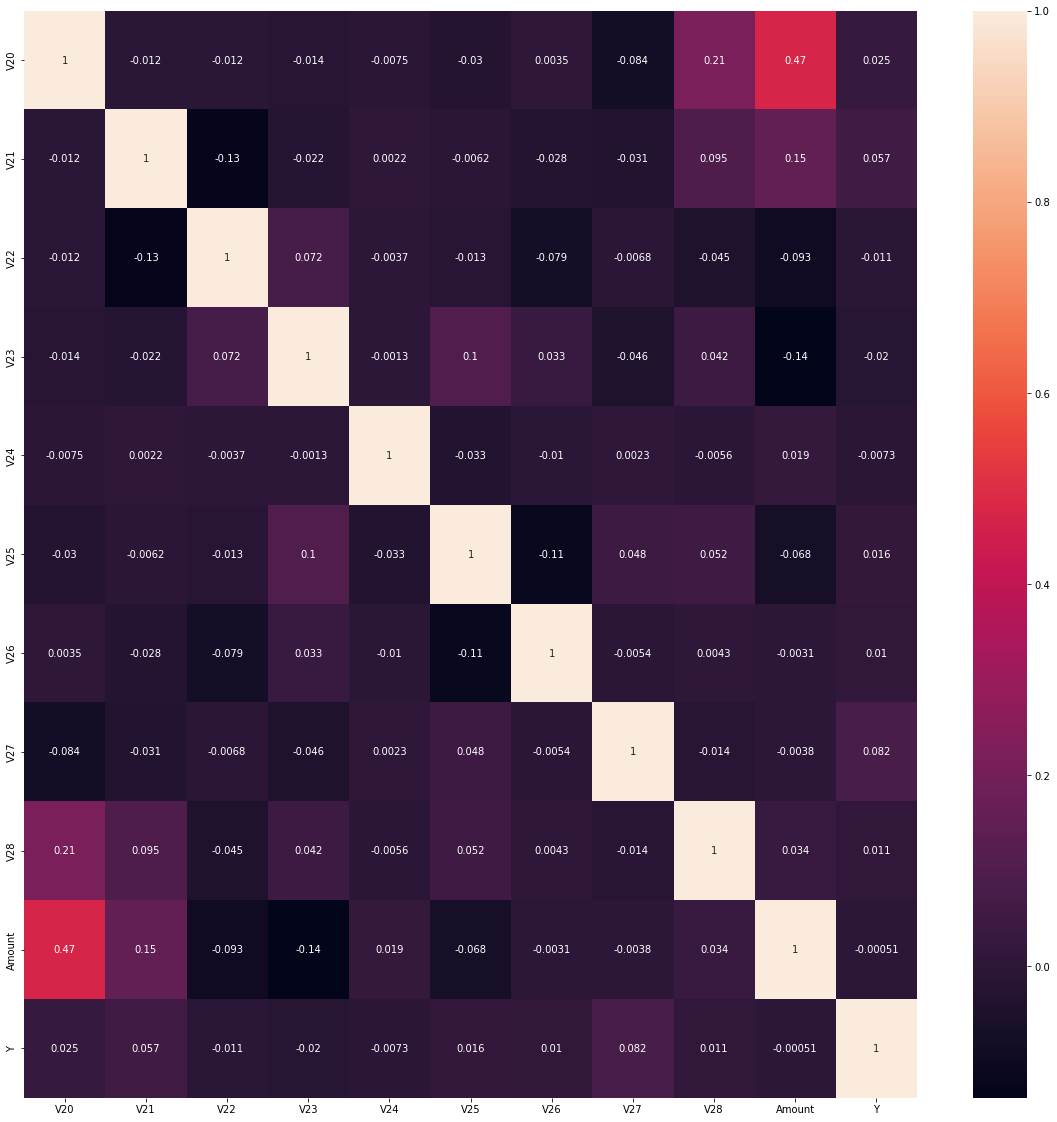

In [36]:
plt.figure(figsize=(20,20))
corr = X_map_3_data.corr()
map_3 = sns.heatmap(corr,annot=True)

In the last 10 features, we can see that the correlation of Y with any other feature is quite low. After all 3 maps, we can see that not a very good distinction can be made for choice of best features. Therefore we need a better way of choosing optimum features.

# Feature Selection Using Extra Tree Classifier

Extra Tree Classifier (Also known as Extremely Randomized Tree Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest. It calculates importance of each feature and selects top K features with maximum importance. For our problem, K <= 30.

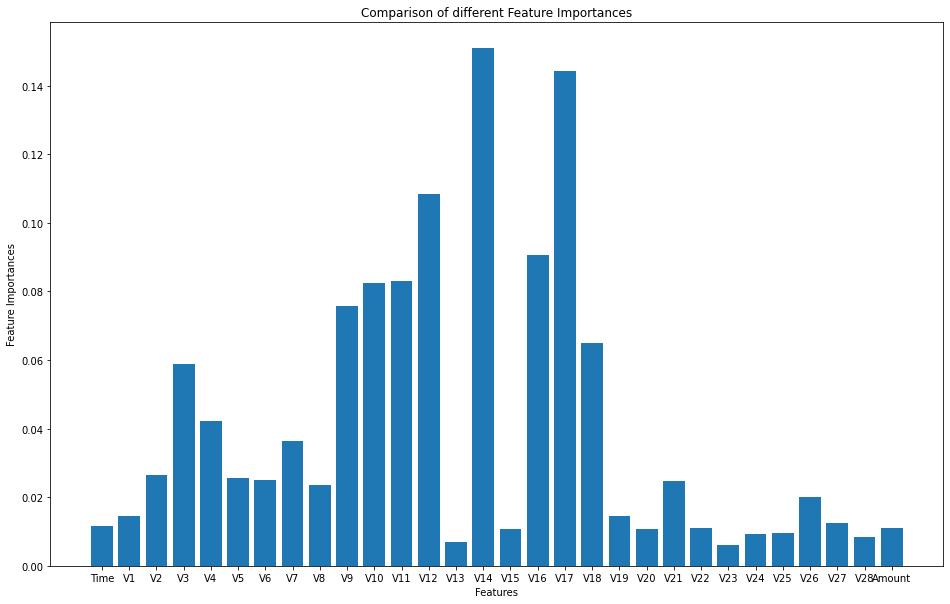

In [38]:
plt.figure(figsize=(16,10))
model = ExtraTreesClassifier()
model.fit(X_data,Y_data)
importances = model.feature_importances_
importance_normalised = np.std([tree.feature_importances_ for tree in model.estimators_],axis = 0)
plt.bar(X_data.columns, importance_normalised)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [23]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

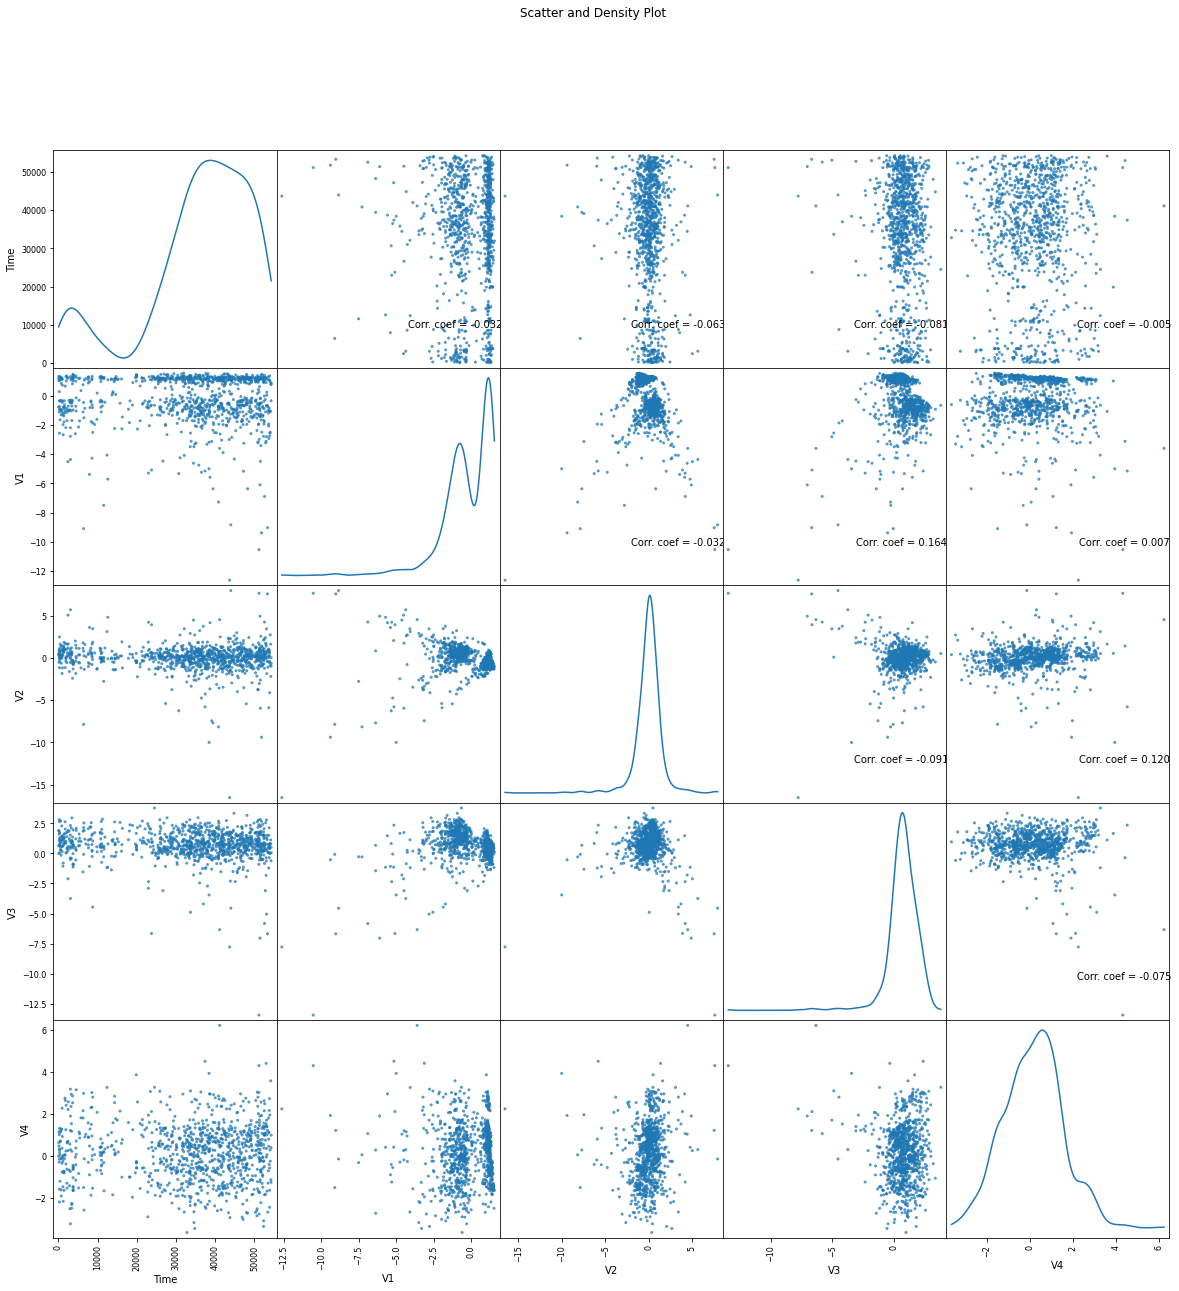

In [24]:
plotScatterMatrix(X_data.iloc[0:1000,0:5],20,10)